In [3]:
from netCDF4 import Dataset, num2date, date2num
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from mpl_toolkits.basemap import Basemap

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [4]:
def sh(year='2013', var='air', time=0):
    f = Dataset(var+'.sig995.'+year+'.nc')
    vv = f.variables[var]
    tt = f.variables['time']
    dd = num2date(tt[time], tt.units)
    m.drawparallels(arange(-80.,81.,20.))
    m.drawmeridians(arange(-180.,181.,20.))
    m.drawmapboundary(fill_color='white')
    m.drawcoastlines()
    m.drawcountries()
    cs = m.pcolor(x,y,vv[time,:,:])
    return vv[time,:,:]

In [7]:
#f = Dataset('air.sig995.2013.nc')
#vv=f.variables['air']

In [9]:
m = Basemap(width=10000000,height=4000000,resolution='l',projection='stere', lon_0=-110,lat_0=-20, area_thresh=1000)
lon = f.variables['lon'][:]
lat = f.variables['lat'][:]
lon, lat = meshgrid(lon, lat)
x, y = m(lon, lat)

In [10]:
variabs = ['air','uwnd','vwnd','rhum']
years = [str(x) for x in range(2013,2016)]

array([[ 91.75,  91.75,  91.75, ...,  91.75,  91.75,  91.75],
       [ 62.5 ,  59.  ,  55.25, ...,  72.25,  69.25,  66.  ],
       [ 81.5 ,  81.25,  80.75, ...,  83.25,  82.5 ,  82.  ],
       ..., 
       [ 75.5 ,  80.  ,  84.75, ...,  61.25,  65.5 ,  70.25],
       [ 81.25,  81.5 ,  82.  , ...,  80.  ,  80.  ,  80.75],
       [ 84.75,  84.75,  84.75, ...,  84.75,  84.75,  84.75]], dtype=float32)

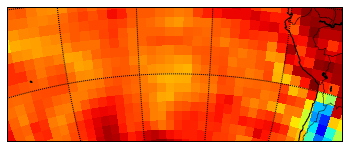

In [12]:
var= sh()
interact(sh,time=(0,355,1), var=variabs, year=years)
plt.show()